In [1]:
%matplotlib qt

In [1]:
import matplotlib as mpl
import sys
sys.path.append("/Users/yao/Smilei")
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_55392/621321092.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [2]:
wkdir = [
     # '/Users/yao/Documents/Data/ELI2025/eli_Aug27_2um/',
     # '/Users/yao/Documents/Data/ELI2025/eli_Aug28_0.8um/',
     # '/Users/yao/Documents/Data/ELI2025/eli_Aug29_0.8um/',
     # '/Users/yao/Documents/Data/ELI2025/eli_Sep01_0.8um/',
     # '/Users/yao/Documents/Data/ELI2025/eli_Sep03_0.8um/',
     # '/Users/yao/Documents/Data/ELI2025/eli_Sep04_0.8um/',
     # '/Users/yao/Documents/Data/ELI2025/eli_Sep02_0.8um/',
     '/Users/yao/Desktop/eli_Sep05_2um/',
     '/Users/yao/Desktop/eli_Sep05_0.8um/',
    ]

In [3]:
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S2 = happi.Open(wkdir[2], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S3 = happi.Open(wkdir[3], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S4 = happi.Open(wkdir[4], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S5 = happi.Open(wkdir[5], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S6 = happi.Open(wkdir[6], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))

I_0 = 1.5e+21 W/cm2
a_0 =  26.88270100135983
Loaded simulation '/Users/yao/Desktop/eli_Sep05_2um/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
I_0 = 1.5e+21 W/cm2
a_0 =  26.88270100135983
Loaded simulation '/Users/yao/Desktop/eli_Sep05_0.8um/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics


In [4]:
# prepare constants, units

me = 9.1e-31
mp = 1836.*me
qe = 1.6e-19
ep = 8.9e-12  # epsilon_0
c  = 3.0e8
wr = S0.namelist.wr
de = c / wr
Lx = S0.namelist.Lsim[0].real / 2 / np.pi      # in um
dx = Lx/S0.namelist.resx           # in mm

Te = S0.namelist.temp_e * 511.e3             # in eV
ne = 1e20 #S0.namelist.n0                              # in cm-3
ld = 7.43e2 * Te**0.5 * ne**(-0.5) * 10. # in mm
dt = S0.namelist.Tsim / S0.namelist.rest

B0 = S0.namelist.B0 * (me * wr / qe)
wc = qe * B0 / me
print("B0 = ", B0)

B0 =  20.0


In [5]:
Lx = S0.namelist.Lsim[0].real / 2 / np.pi      # in um
print("Lx = ", Lx)
Ly = S0.namelist.Lsim[1].real / 2 / np.pi      # in um
print("Ly = ", Ly)

Lx =  160.0
Ly =  160.0


In [11]:
np0 = S0.ParticleBinning('#1+#2', units=['fs','um','1/cm^3'],
                         data_log='True',
                         # ymin=0,ymax=32,
                         vmin=18,vmax=24,
                         xmin=30, xmax=70,
                         cmap=newcmap,
                         timesteps=[0],
                         subset={'y':Ly/2},
                   color='blue',
              label='2 um',
                   )#.slide()

np1 = S1.ParticleBinning('#1+#2', units=['fs','um','1/cm^3'],
                         data_log='True',
                        #  ymin=0,ymax=32,
                         vmin=18,vmax=24,
                         xmin=30, xmax=70,
                         cmap=newcmap,
                         timesteps=[0],
                         subset={'y':Ly/2},
                   color='red',
                   linestyle='--',
              label='0.8 um',
                   )#.slide()

# np2 = S2.ParticleBinning('#1+#2', units=['fs','um','1/cm^3'],
#                          data_log='True',
#                         #  ymin=0,ymax=32,
#                          # vmin=17,vmax=23,
#                          xmin=50, xmax=80,
#                          cmap=newcmap,
#                          timesteps=[0],
#                          subset={'y':Ly/2},
#                    color='orange',
#                    linestyle=':',
#               label='0.8 um - case 2',
#                    )#.slide()

# np3 = S3.ParticleBinning('#1+#2', units=['fs','um','1/cm^3'],
#                          data_log='True',
#                         #  ymin=0,ymax=32,
#                          # vmin=17,vmax=23,
#                          xmin=50, xmax=80,
#                          cmap=newcmap,
#                          timesteps=[0],
#                          subset={'y':Ly/2},
#                    color='cyan',
#                    linestyle=':',
#               label='0.8 um - case 3',
#                    )#.slide()

# np4 = S4.ParticleBinning('#1+#2', units=['fs','um','1/cm^3'],
#                          data_log='True',
#                         #  ymin=0,ymax=32,
#                          # vmin=17,vmax=23,
#                          xmin=50, xmax=80,
#                          cmap=newcmap,
#                          timesteps=[0],
#                          subset={'y':Ly/2},
#                    color='magenta',
#                    linestyle='-.',
#               label='0.8 um - case 4',
#                    )#.slide()

# np5 = S5.ParticleBinning('#1+#2', units=['fs','um','1/cm^3'],
#                          data_log='True',
#                         #  ymin=0,ymax=32,
#                          # vmin=17,vmax=23,
#                          xmin=50, xmax=80,
#                          cmap=newcmap,
#                          timesteps=[0],
#                          subset={'y':Ly/2},
#                    color='green',
#                    linestyle='-.',
#               label='0.8 um - case 5',
#                    )#.slide()

# np6 = S6.ParticleBinning('#1+#2', units=['fs','um','1/cm^3'],
#                          data_log='True',
#                         #  ymin=0,ymax=32,
#                          # vmin=17,vmax=23,
#                          xmin=50, xmax=80,
#                          timesteps=[0],
#                          cmap=newcmap,
#                          subset={'y':Ly/2},
#                    color='black',
#                    linestyle='-.',
#               label='0.8 um - case 6',
#                    )#.slide()

happi.multiPlot(np0, np1, 
               #  np2, np3, np4, np5, np6,
                skipAnimation=True)

In [24]:
## note that here we need to use the num to locate the time of about 500 fs, instead of using the last timestep.

num = -15

es0 = S0.ParticleBinning('#6', units=['fs','um','1/cm^3','MeV'],
                   data_log='True',
                   xmin=0,xmax=35,
                   timestep_indices=[num],
                #    vmin=-7,vmax=-2,
                   color='blue',
                   label='2 um',
                   linestyle='-',
                   )#.slide()

es1 = S1.ParticleBinning('#6', units=['fs','um','1/cm^3','MeV'],
                   data_log='True',
                   xmin=0,xmax=35,
                   timestep_indices=[num],
                #    vmin=-7,vmax=-2,
                   color='red',
                   label='0.8 um',
                   linestyle='--',
                   )#.slide()

# es2 = S2.ParticleBinning('#6', units=['fs','um','1/cm^3','MeV'],
#                    data_log='True',
#                    xmin=0,xmax=30,
#                 #    vmin=-7,vmax=-2,
#                    color='orange',
#                    label='0.8 um - case 2',
#                    linestyle=':',
#                    )#.slide()

# es3 = S3.ParticleBinning('#6', units=['fs','um','1/cm^3','MeV'],
#                    data_log='True',
#                    xmin=0,xmax=30,
#                 #    vmin=-7,vmax=-2,
#                    color='cyan',
#                    label='0.8 um - case 3',
#                    linestyle=':',
#                    )#.slide()

# es4 = S4.ParticleBinning('#6', units=['fs','um','1/cm^3','MeV'],
#                    data_log='True',
#                    xmin=0,xmax=30,
#                 #    vmin=-7,vmax=-2,
#                    color='magenta',
#                    label='0.8 um - case 4',
#                    linestyle='-.',
#                    )#.slide()

# es5 = S5.ParticleBinning('#6', units=['fs','um','1/cm^3','MeV'],
#                    data_log='True',
#                    xmin=0,xmax=30,
#                 #    vmin=-7,vmax=-2,
#                    color='green',
#                    label='0.8 um - case 5',
#                    linestyle='-.',
#                    )#.slide()

# es6 = S6.ParticleBinning('#6', units=['fs','um','1/cm^3','MeV'],
#                    data_log='True',
#                    xmin=0,xmax=30,
#                 #    vmin=-7,vmax=-2,
#                    color='black',
#                    label='0.8 um - case 4',
#                    linestyle='-.',
#                    )#.slide()

happi.multiPlot(es0, es1, 
               #  es2, es3, es4, es5, es6,
                skipAnimation=True)

In [9]:
Ex0 = S0.Field(1,'Ex',units=['fs','um','V/m'],
               vsym=5e12,
               subset={'y':Ly/2},
               # subset={'y':640},
               color='blue',
               label='2 um',
               )#.slide(figure=3)

Ex1 = S1.Field(1,'Ex',units=['fs','um','V/m'],
               vsym=5e12,
               subset={'y':Ly/2},
               # subset={'y':640},
               color='red',
               linestyle='--',
                label='0.8 um',
               )#.slide(figure=3)

Ex2 = S2.Field(1,'Ex',units=['fs','um','V/m'],
               vsym=5e12,
               subset={'y':Ly/2},
               # subset={'y':640},
               color='orange',
               linestyle=':',
                label='0.8 um, rear-plasma',
               )#.slide(figure=3)

happi.multiSlide(Ex0, Ex1, Ex2)

In [8]:
# Phase space distribution -- protons

ps0 = S0.ParticleBinning('#3', units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-5,
                   vmax=1,
                  #  aspect=1.0,
                   xmin=50,xmax=100,
                   ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   )#.slide()

ps1 = S1.ParticleBinning('#3', units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-5,
                   vmax=1,
                  #  aspect=1.0,
                   xmin=50,xmax=100,
                   ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   )#.slide()

ps2 = S2.ParticleBinning('#3', units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-5,
                   vmax=1,
                  #  aspect=1.0,
                   xmin=50,xmax=100,
                   ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   )#.slide()

# ps0.set(set_layout_engine='tight')
# ps0.slide()

# happi.multiSlide(ps0, ps1, ps2, shape=(1,3))
happi.multiPlot(ps0, ps1, ps2, shape=(1,3),
                figsize=(16,5),
                # skipAnimation=True,
                movie="es.mp4",
                dpi=200,
                )

/Users/yao/Smilei/happi/_Utils.py:602: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  self.fig = self.plt.figure(**self.options.figure0)
/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [6]:
np1 = np.array(S1.ParticleBinning('#1+#2', 
                                  units=['fs','um','1/cm^3'],
                                  data_log='True',
                                  ).getData()[0])

/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [11]:
np1_x = np.array(S1.ParticleBinning('#1+#2', 
                                  units=['fs','um','1/cm^3'],
                                  data_log='True',
                                  ).getAxis('x'))

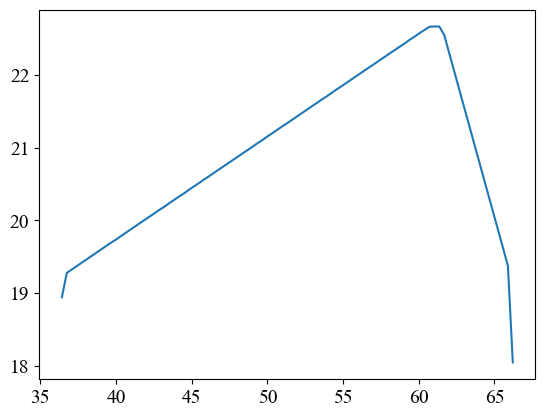

In [14]:
plt.plot(np1_x, np1[:,200])

In [57]:
multi_den = np.loadtxt('/Users/yao/Desktop/I3e31_0.8um_500ps.csv')
multi_den2 = np.loadtxt('/Users/yao/Desktop/I1e32_0.8um_600ps.csv')
multi_den3 = np.loadtxt('/Users/yao/Desktop/I3e30_0.8um_600ps.csv')

In [58]:
multi_den_x = multi_den[:,0] # position in um
multi_den_y = multi_den[:,1] # density in cm-3

multi_den_x2 = multi_den2[:,0] # position in um
multi_den_y2 = multi_den2[:,1] # density in cm-3

multi_den_x3 = multi_den3[:,0] # position in um
multi_den_y3 = multi_den3[:,1] # density in cm-3

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_55392/2702990305.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-(multi_den_x-30.5), np.log10(multi_den_y),'--',color='blue',label='MULTI@3e14')
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_55392/2702990305.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-(multi_den_x2-3), np.log10(multi_den_y2),':',color='cyan',label='MULTI@1e15')
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_55392/2702990305.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-(multi_den_x3-54), np.log10(multi_den_y3),'-.',color='green',label='MULTI@3e13')


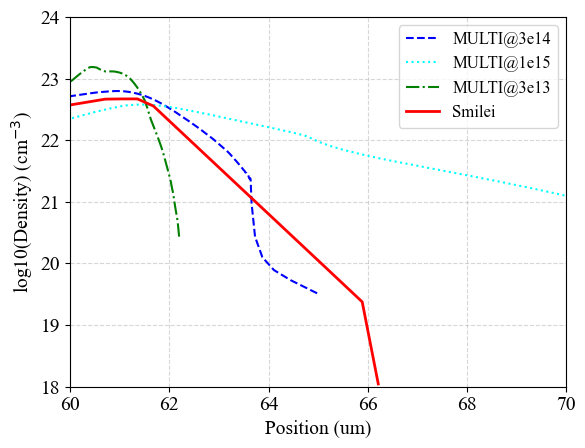

In [72]:
plt.plot(-(multi_den_x-30.5), np.log10(multi_den_y),'--',color='blue',label='MULTI@3e14')
plt.plot(-(multi_den_x2-3), np.log10(multi_den_y2),':',color='cyan',label='MULTI@1e15')
plt.plot(-(multi_den_x3-54), np.log10(multi_den_y3),'-.',color='green',label='MULTI@3e13')
plt.plot(np1_x, np1[:,200],'-',color='red',label='Smilei',linewidth=2)
plt.xlim(60,70)
plt.xlabel('Position (um)')
plt.ylabel('log10(Density) (cm$^{-3}$)')
plt.ylim(18,24)
plt.grid(alpha=0.5, linestyle='--')
plt.legend()